## Simple Moving Average (SMA)

In [79]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import backtrader as bt

In [80]:
class SMA(bt.Strategy):
    params = (
        ('smafast', 5),
        ('smaslow', 40)
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close

        self.order = None
        self.buyprice = None
        self.buycomm = None

        self.sma= bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.smafast)
        self.sma= bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.smaslow)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'Buy Executed, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log('Sell Executed, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        if self.order:
            return
        if not self.position:

            if self.dataclose[0] > self.sma[0]:

                self.log('Buy Create, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                self.log('Sell Create, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()                
                



In [81]:
#Instantiate Cerebro engine
cerebro = bt.Cerebro()

In [82]:
#Add data feed to Cerebro
data = bt.feeds.YahooFinanceCSVData(
    dataname='data/BAJFINANCE.NS.csv',
    fromdate=datetime.datetime(2018, 1,1),
    todate=datetime.datetime(2019, 12, 31))
cerebro.adddata(data)

In [83]:
#Add strategy to Cerebro
cerebro.addstrategy(SMA)


0

In [84]:
# Set our desired cash start
cerebro.broker.setcash(100000.0)
# Set the commission
cerebro.broker.setcommission(commission=0.01)

In [85]:
# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00


In [86]:
#Run Cerebro Engine
cerebro.run()

2018-03-13, Buy Create, 1671.04
2018-03-14, Buy Executed, Price: 1662.39, Cost: 1662.39, Comm 16.62
2018-03-19, Sell Create, 1622.47
2018-03-20, Sell Executed, Price: 1617.65, Cost: 1662.39, Comm 16.18
2018-03-20, OPERATION PROFIT, GROSS -44.74, NET -77.54
2018-03-21, Buy Create, 1694.75
2018-03-22, Buy Executed, Price: 1698.18, Cost: 1698.18, Comm 16.98
2018-05-10, Sell Create, 1826.84
2018-05-11, Sell Executed, Price: 1834.40, Cost: 1698.18, Comm 18.34
2018-05-11, OPERATION PROFIT, GROSS 136.22, NET 100.89
2018-05-11, Buy Create, 1850.80
2018-05-14, Buy Executed, Price: 1852.39, Cost: 1852.39, Comm 18.52
2018-09-05, Sell Create, 2705.93
2018-09-06, Sell Executed, Price: 2717.98, Cost: 1852.39, Comm 27.18
2018-09-06, OPERATION PROFIT, GROSS 865.59, NET 819.89
2018-09-07, Buy Create, 2733.12
2018-09-10, Buy Executed, Price: 2720.97, Cost: 2720.97, Comm 27.21
2018-09-10, Sell Create, 2605.09
2018-09-11, Sell Executed, Price: 2610.41, Cost: 2720.97, Comm 26.10
2018-09-11, OPERATION PROFI

In [87]:
# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Final Portfolio Value: 101155.60


<IPython.core.display.Javascript object>


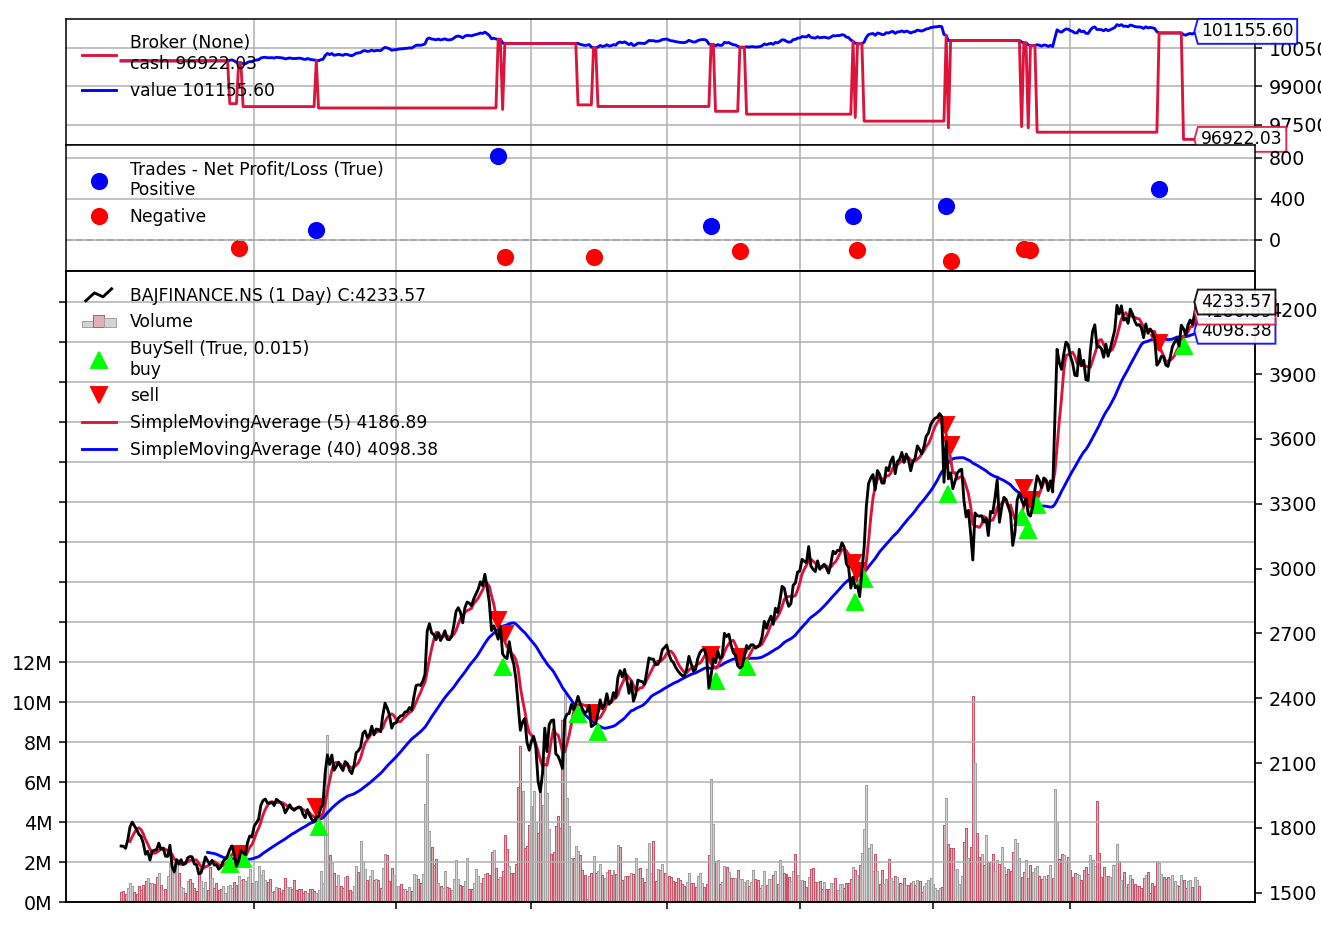

[[<Figure size 640x480 with 4 Axes>]]

In [88]:
cerebro.plot()